# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Eva COSSAIS

In [1]:
import pandas as pd

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [63]:
df = pd.read_csv('C:/Users/evaco/Documents/FAC/M2/SEM9/Python/data-science-tutorials/introduction-to-python/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [5]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

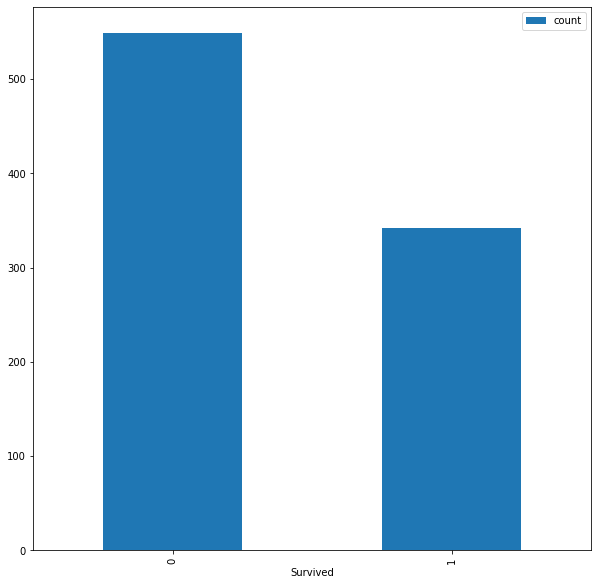

In [6]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [7]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [8]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

<Axes: xlabel='Survived'>

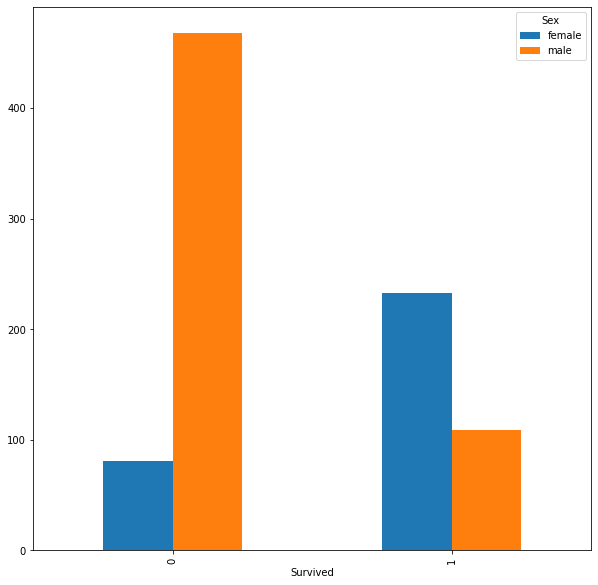

In [9]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [10]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [11]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

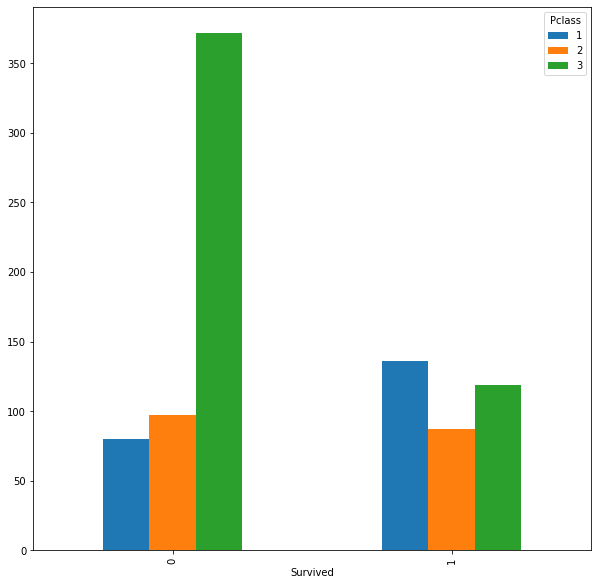

In [12]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [13]:
df['generation'] = pd.cut(df['Age'], 8)

In [14]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(df['Age'], 8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]"


<Axes: xlabel='Survived'>

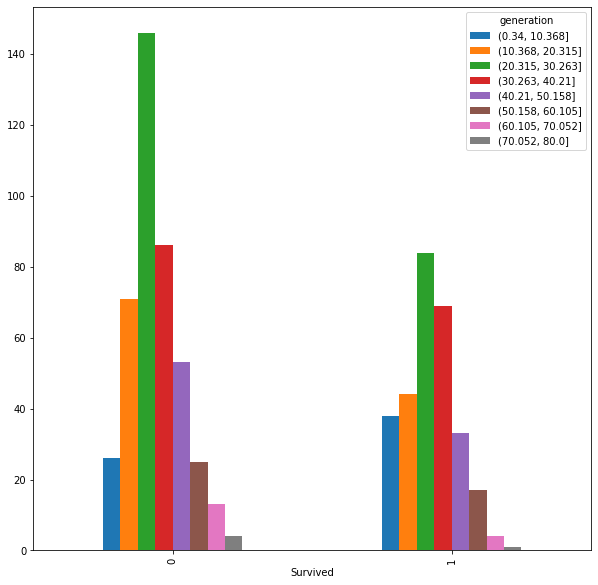

In [16]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [17]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [18]:
pd.cut(df['Fare'], 10)

0       (-0.512, 51.233]
1      (51.233, 102.466]
2       (-0.512, 51.233]
3      (51.233, 102.466]
4       (-0.512, 51.233]
             ...        
886     (-0.512, 51.233]
887     (-0.512, 51.233]
888     (-0.512, 51.233]
889     (-0.512, 51.233]
890     (-0.512, 51.233]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

<Axes: xlabel='Survived'>

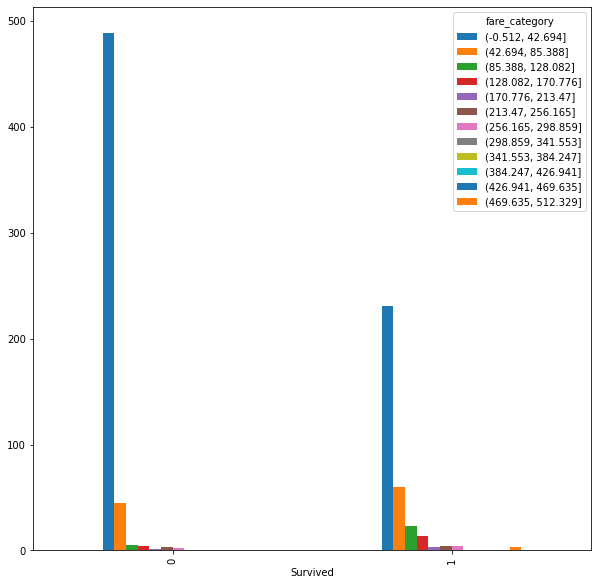

In [19]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [20]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [21]:
import jinja2
print(jinja2.__version__)
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

3.0.0


,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 

d'après le graphique il est préférable d'être du côté starboard

<Axes: xlabel='side'>

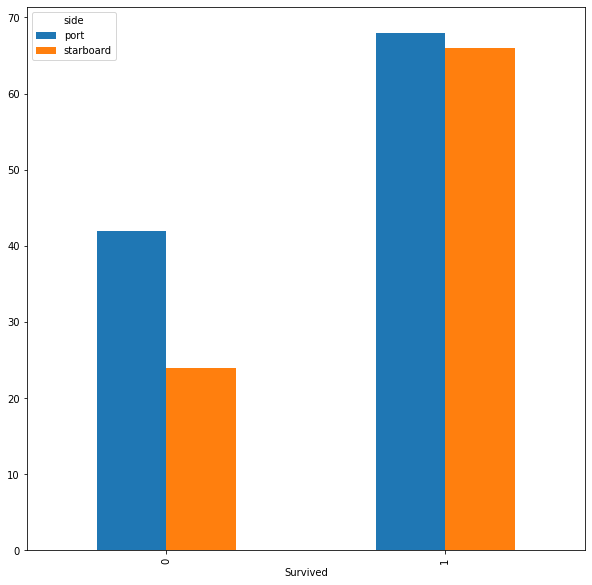

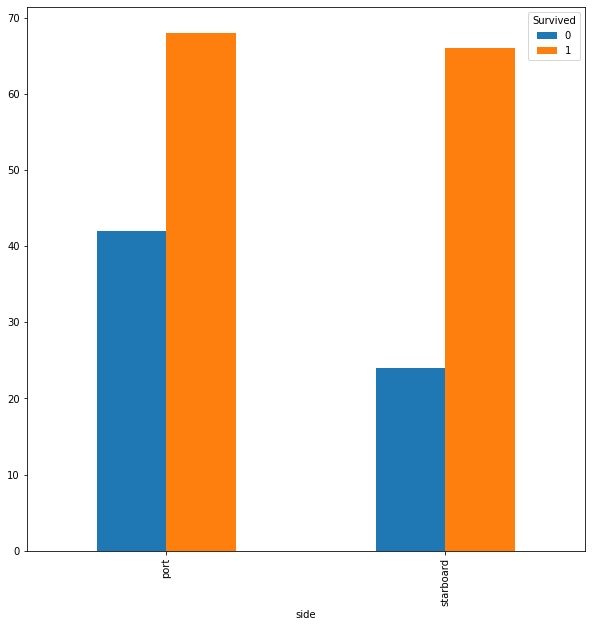

In [64]:
import numpy as np

def findside(x):
    if str(x)[-1] in ('1', '3','5','7','9'):
        return 'starboard'
    elif str(x)[-1] in ('0', '2','4','6','8'):
        return 'port'
    
df['Cabin'] = df['Cabin'].replace('NaN', np.nan)    
df['side'] = df['Cabin'].apply(findside)


df.groupby(
    ['Survived', 'side']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))
df.groupby(
    [ 'side','Survived']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?
d'après les graphes, il vaut mieux vivre sur le pont B ou (D ou E)

#### Where is the best place to be on the boat in general?

starboard B (ou D ou E)


better to be on staboard


<Axes: xlabel='Deck'>

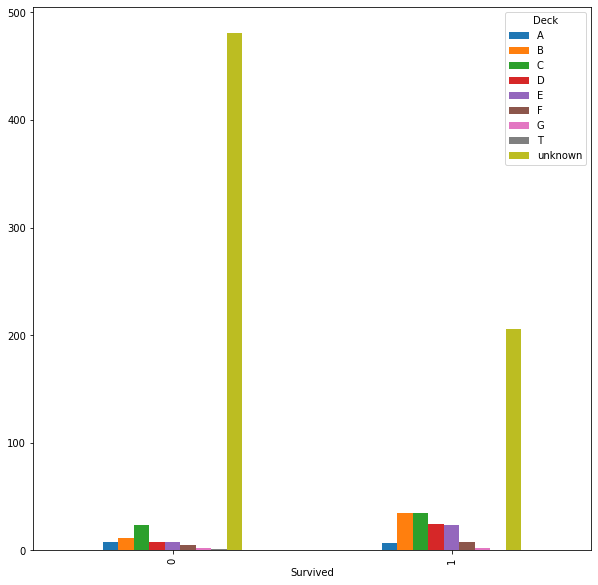

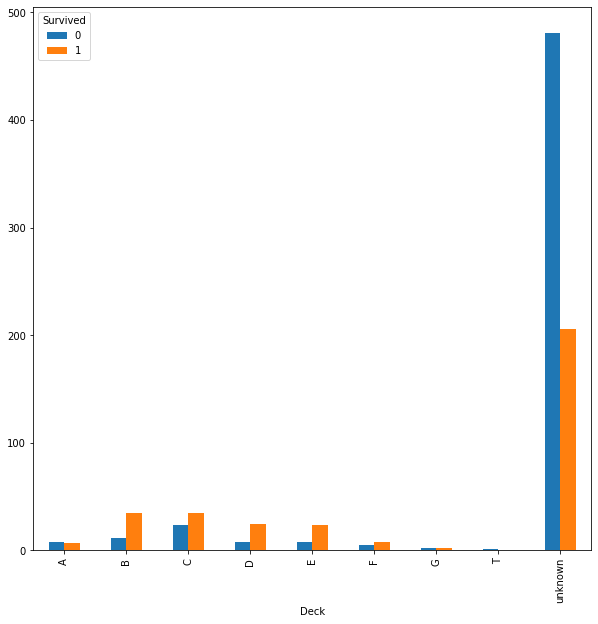

In [71]:
import matplotlib.pyplot as plt

df['Cabin'] = df['Cabin'].replace(np.nan,'NaN')
def finddeck(x):
    if x == 'NaN':
        return 'unknown'
    else :
        return str(x)[0]


df['Deck'] = df['Cabin'].apply(finddeck)

df.groupby(
    ['Survived','Deck']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

df.groupby(
    ['Deck','Survived']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Is there a link between the number of parents/family on the boat and chances of survival?

          count       
Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN
Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64


<Axes: title={'center': 'Parch'}, xlabel='Survived'>

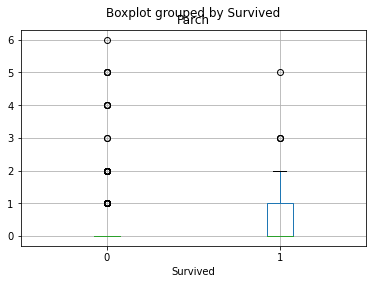

In [97]:
print(df.groupby(
    ['Parch','Survived']
)['PassengerId'].agg(['count']).unstack())

print(df.groupby("Survived")["Parch"].mean())

df.boxplot(column="Parch",by='Survived')

#### What is the typical profile of the person who will survive the shipwreck?
une femme en classe 1, plutôt jeune, avoir un frère ou soeur (ou 0), une grande famille, un ticket avec un prix élevé, et embarquer en C.

#### What is the typical profile of the person who will not survive the shipwreck?

un homme en classe 3, plus vieux, beacoup de frère et soeur, petit famille, ticket pas chère et embarquer en S

In [100]:
print(df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].agg(['count']))


print(df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack())


print(df.groupby("Survived")["Age"].mean())


print(df.groupby(
    ['SibSp','Survived']
)['PassengerId'].agg(['count']).unstack())
print(df.groupby("Survived")["SibSp"].mean())

print(df.groupby(
    ['Parch','Survived']
)['PassengerId'].agg(['count']).unstack())
print(df.groupby("Survived")["Parch"].mean())

print(df.groupby("Survived")["Fare"].mean())

print(df.groupby(
    ['Embarked','Survived']
)['PassengerId'].agg(['count']).unstack())

                 count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119
          count     
Sex      female male
Survived            
0            81  468
1           233  109
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
          count       
Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN
Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64
          count       
Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN
Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype